# Testing RTE in synthesis mode (PSF)

In [1]:
# Loading libraries

import matplotlib.pyplot as plt
import numpy as np

import milos as pym
cmd = '../milos/lib/./milos.x'

### create input file for PMILOS

We will generate 10000 different randon models for testing.

In [2]:
n_models = 10000
model = np.array([200.,30.,30.,8.5, 0.070, 0.08, 0.2, 0.2, 0.8 ]) # base model
rand = np.random.rand(n_models,4)

model_big = np.repeat(model[np.newaxis,: ], n_models, axis=0)
model_big[:,0] = rand[:,0] * 2500.
model_big[:,1] = rand[:,1] * 180.
model_big[:,2] = rand[:,2] * 180.
model_big[:,6] = rand[:,3] * 14. - 7
 
# B, gamma, phi, eta0, landadopp,aa, vlos, S0, S1
wave_axis = np.linspace(6173.3354-0.4,6173.3354+0.4,30)
wave_axis = np.array([6173.3354-0.160,6173.3354-0.08,6173.3354,6173.3354+0.08,6173.3354+0.160,6173.3354+0.300])

In [3]:
options = [0,0,0,0,0,0,0,0,0]
options[0] = len(wave_axis) #NLAMBDA wave axis dimension
options[1] = 30 #MAX_ITER max number of iterations
options[2] = 1 #CLASSICAL_ESTIMATES [0,1,2] 0=RTE, 1= CE+RTE, 2= CE
options[3] = 1 #RFS [0,1,2] 0.-> Inversion, 1-> synthesis 2-> RFS

PMILOS FULL MODEL SYN 

In [4]:
pmilos_syn = pym.phi_rte(model_big, wave_axis, rte_mode = 'SYN')

No input options. Setting for PHI only.
Using defaults weights.
Using defaults init model.
RTE_MODE  SYN
Using PMILOS version
  ---- >>>>> Synthesizing data.... 
Options [in pymilos]:  [ 6 30  1  1  0  0  0  0  0]
models (milos.pyx):  10000
------ flattened:  (90000,)
profiles to synthesize = 10000
  ---- >>>>> Finishing.... 


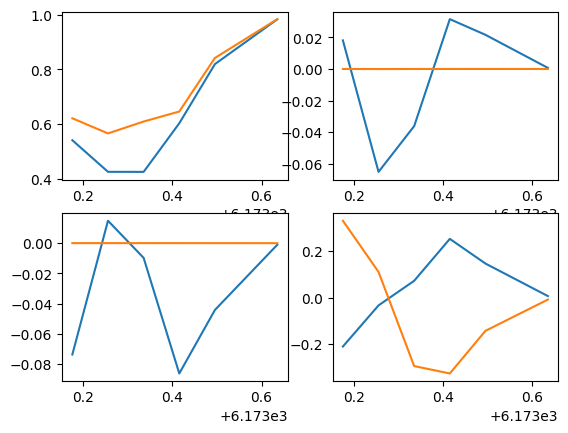

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot(wave_axis,pmilos_syn[0,0,:],'-')
ax[0,1].plot(wave_axis,pmilos_syn[0,1,:],'-')
ax[1,0].plot(wave_axis,pmilos_syn[0,2,:],'-')
ax[1,1].plot(wave_axis,pmilos_syn[0,3,:],'-')
ax[0,0].plot(wave_axis,pmilos_syn[1000,0,:],'-')
ax[0,1].plot(wave_axis,pmilos_syn[1000,1,:],'-')
ax[1,0].plot(wave_axis,pmilos_syn[1000,2,:],'-')
ax[1,1].plot(wave_axis,pmilos_syn[1000,3,:],'-')
plt.show()

In [7]:
#noise
sigma = 5e-3
profile_noise = np.random.randn(n_models,4,len(wave_axis)) * sigma

In [8]:
pmilos_syn_noisy = pmilos_syn + profile_noise

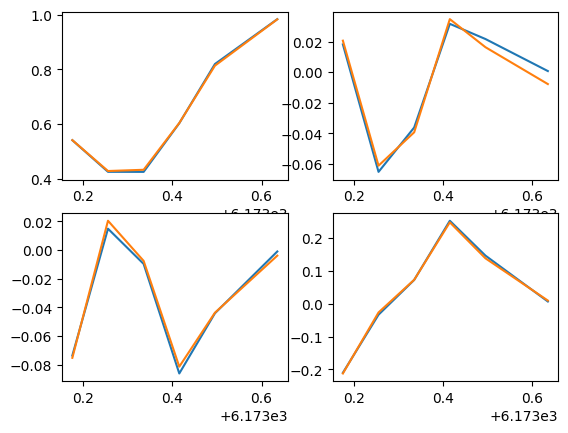

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot(wave_axis,pmilos_syn[0,0,:],'-')
ax[0,1].plot(wave_axis,pmilos_syn[0,1,:],'-')
ax[1,0].plot(wave_axis,pmilos_syn[0,2,:],'-')
ax[1,1].plot(wave_axis,pmilos_syn[0,3,:],'-')
ax[0,0].plot(wave_axis,pmilos_syn_noisy[0,0,:],'-')
ax[0,1].plot(wave_axis,pmilos_syn_noisy[0,1,:],'-')
ax[1,0].plot(wave_axis,pmilos_syn_noisy[0,2,:],'-')
ax[1,1].plot(wave_axis,pmilos_syn_noisy[0,3,:],'-')

In [10]:
pmilos_syn_noisy = np.einsum('ijk->kji',pmilos_syn_noisy)

PMILOS FULL MODEL INVERSION 

In [11]:
np.shape(pmilos_syn_noisy)

(6, 4, 10000)

In [12]:
options = [0,0,0,0,0,0,0,0,0]
options[0] = len(wave_axis) #NLAMBDA wave axis dimension
options[1] = 30 #MAX_ITER max number of iterations
options[2] = 1 #CLASSICAL_ESTIMATES [0,1,2] 0=RTE, 1= CE+RTE, 2= CE
options[3] = 0 #RFS [0,1,2] 0.-> Inversion, 1-> synthesis 2-> RFS
options[7] = 0
options[8] = 0


In [13]:
pmilos_inv = pym.phi_rte(pmilos_syn_noisy, wave_axis, rte_mode = 'CE+RTE',options=options)

Using defaults weights.
Using defaults init model.
RTE_MODE  CE+RTE
options:  [ 6 30  1  0  0  0  0  0  0]
Using PMILOS version
   input shape in phi_rte:  (6, 4, 10000)
   no reshaping needed:  (6, 4, 10000)
   reshaping data. New data shape (10000, 4, 6) should be (y * x,pol,wave) for C
Entering pmilos
Options [in pymilos]:  [ 6 30  1  0  0  0  0  0  0]
input_data shape [in pymilos]:  10000 4 6
------ flattened:  (240000,)
Weights  [in pymilos]:  [ 1. 10. 10.  4.]
Initial Model  [in pymilos]:  [4.00e+02 3.00e+01 1.20e+02 3.00e+00 2.05e-02 1.00e+00 1.00e-02 1.50e-01
 8.50e-01]
profiles to invert = 10000


In [14]:
model_big.shape

(10000, 9)

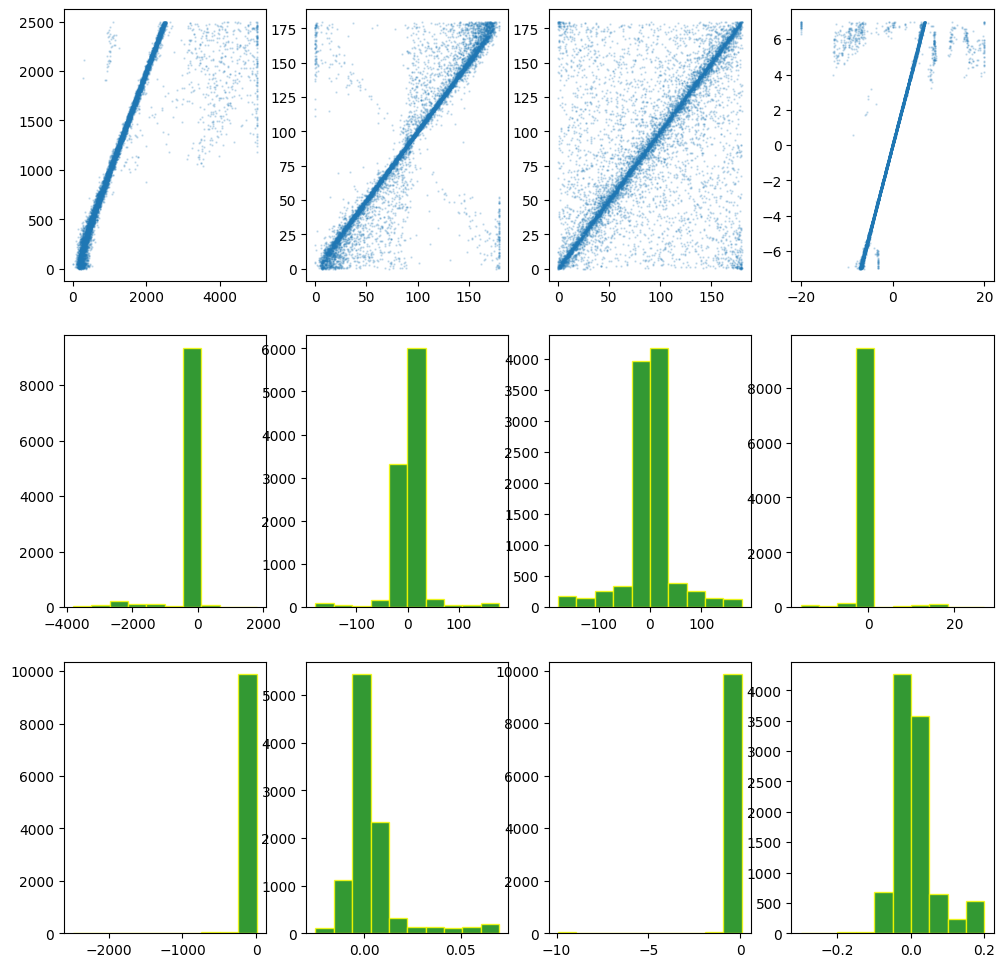

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=4,figsize=(12,12))
ax[0,0].scatter(pmilos_inv[2,:,0],model_big[:,0],s=0.5,alpha=0.2)
ax[0,1].scatter(pmilos_inv[3,:,0],model_big[:,1],s=0.5,alpha=0.2)
ax[0,2].scatter(pmilos_inv[4,:,0],model_big[:,2],s=0.5,alpha=0.2)
ax[0,3].scatter(pmilos_inv[8,:,0],model_big[:,6],s=0.5,alpha=0.2)
ax[1,0].hist(model_big[:,0]-pmilos_inv[2,:,0],alpha=0.8,ec="yellow", fc="green")
ax[1,1].hist(model_big[:,1]-pmilos_inv[3,:,0],alpha=0.8,ec="yellow", fc="green")
ax[1,2].hist(model_big[:,2]-pmilos_inv[4,:,0],alpha=0.8,ec="yellow", fc="green")
ax[1,3].hist(model_big[:,6]-pmilos_inv[8,:,0],alpha=0.8,ec="yellow", fc="green")

ax[2,0].hist(model_big[:,3]-pmilos_inv[5,:,0],alpha=0.8,ec="yellow", fc="green")
ax[2,1].hist(model_big[:,4]-pmilos_inv[6,:,0],alpha=0.8,ec="yellow", fc="green")
ax[2,2].hist(model_big[:,5]-pmilos_inv[7,:,0],alpha=0.8,ec="yellow", fc="green")
ax[2,3].hist(model_big[:,7]-pmilos_inv[9,:,0],alpha=0.8,ec="yellow", fc="green")
# ax[2,2].hist(model_big[:,8]-pmilos_inv[10,0,:],alpha=0.8,ec="yellow", fc="green")
plt.show()

# ax.hist(data, HIST_BINS, lw=1,
#                               ec="yellow", fc="green", alpha=0.5)

PMILOS FULL MODEL SYN + PSF

In [16]:
options_psf = [0,0,0,0,0,0,0,0,0]
options_psf[0] = len(wave_axis) #NLAMBDA wave axis dimension
options_psf[1] = 30 #MAX_ITER max number of iterations
options_psf[2] = 1 #CLASSICAL_ESTIMATES [0,1,2] 0=RTE, 1= CE+RTE, 2= CE
options_psf[3] = 1 #RFS [0,1,2] 0.-> Inversion, 1-> synthesis 2-> RFS
options_psf[4] = 105 #FWHM = atof(argv[5]);
options_psf[5] = int((wave_axis[1] - wave_axis[0])*1000.)#70 ##DELTA = atof(argv[6]);
options_psf[6] = len(wave_axis)  #NMUESTRAS_G = atoi(argv[7]);

In [17]:
pmilos_syn = pym.phi_rte(model_big, wave_axis, rte_mode = 'SYN+PSF',options=options_psf)

Using defaults weights.
Using defaults init model.
RTE_MODE  SYN+PSF
PSF in synthesis version activated
Using PMILOS version
  ---- >>>>> Synthesizing data.... 
Options [in pymilos]:  [  6  30   1   1 105  79   6   0   0]
models (milos.pyx):  10000
------ flattened:  (90000,)
profiles to synthesize = 10000
  ---- >>>>> Finishing.... 


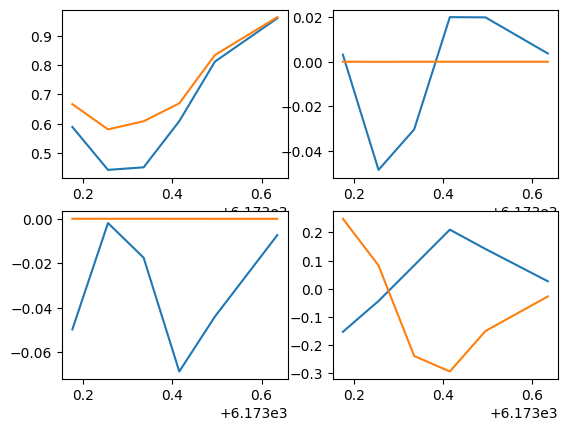

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot(wave_axis,pmilos_syn[0,0,:],'-')
ax[0,1].plot(wave_axis,pmilos_syn[0,1,:],'-')
ax[1,0].plot(wave_axis,pmilos_syn[0,2,:],'-')
ax[1,1].plot(wave_axis,pmilos_syn[0,3,:],'-')
ax[0,0].plot(wave_axis,pmilos_syn[1000,0,:],'-')
ax[0,1].plot(wave_axis,pmilos_syn[1000,1,:],'-')
ax[1,0].plot(wave_axis,pmilos_syn[1000,2,:],'-')
ax[1,1].plot(wave_axis,pmilos_syn[1000,3,:],'-')
plt.show()

In [19]:
#noise
sigma = 5e-3
profile_noise = np.random.randn(n_models,4,len(wave_axis)) * sigma

In [20]:
pmilos_syn_noisy = pmilos_syn + profile_noise

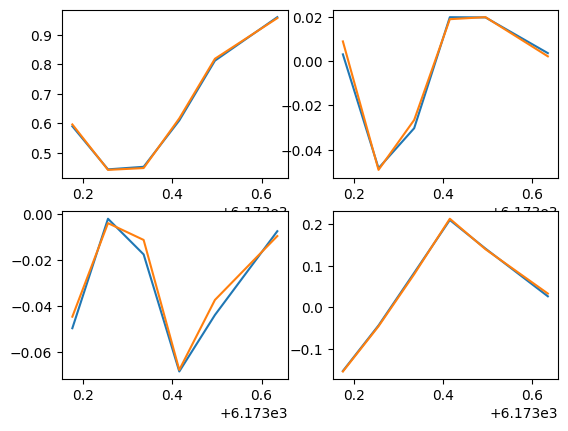

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot(wave_axis,pmilos_syn[0,0,:],'-')
ax[0,1].plot(wave_axis,pmilos_syn[0,1,:],'-')
ax[1,0].plot(wave_axis,pmilos_syn[0,2,:],'-')
ax[1,1].plot(wave_axis,pmilos_syn[0,3,:],'-')
ax[0,0].plot(wave_axis,pmilos_syn_noisy[0,0,:],'-')
ax[0,1].plot(wave_axis,pmilos_syn_noisy[0,1,:],'-')
ax[1,0].plot(wave_axis,pmilos_syn_noisy[0,2,:],'-')
ax[1,1].plot(wave_axis,pmilos_syn_noisy[0,3,:],'-')

In [22]:
pmilos_syn_noisy = np.einsum('ijk->kji',pmilos_syn_noisy)

In [23]:
options_psf[3] = 0
pmilos_inv = pym.phi_rte(pmilos_syn_noisy, wave_axis, rte_mode = 'CE+RTE',options=options_psf)

Using defaults weights.
Using defaults init model.
RTE_MODE  CE+RTE
options:  [  6  30   1   0 105  79   6   0   0]
Using PMILOS version
   input shape in phi_rte:  (6, 4, 10000)
   no reshaping needed:  (6, 4, 10000)
   reshaping data. New data shape (10000, 4, 6) should be (y * x,pol,wave) for C
Entering pmilos
Options [in pymilos]:  [  6  30   1   0 105  79   6   0   0]
input_data shape [in pymilos]:  10000 4 6
------ flattened:  (240000,)
Weights  [in pymilos]:  [ 1. 10. 10.  4.]
Initial Model  [in pymilos]:  [4.00e+02 3.00e+01 1.20e+02 3.00e+00 2.05e-02 1.00e+00 1.00e-02 1.50e-01
 8.50e-01]
profiles to invert = 10000


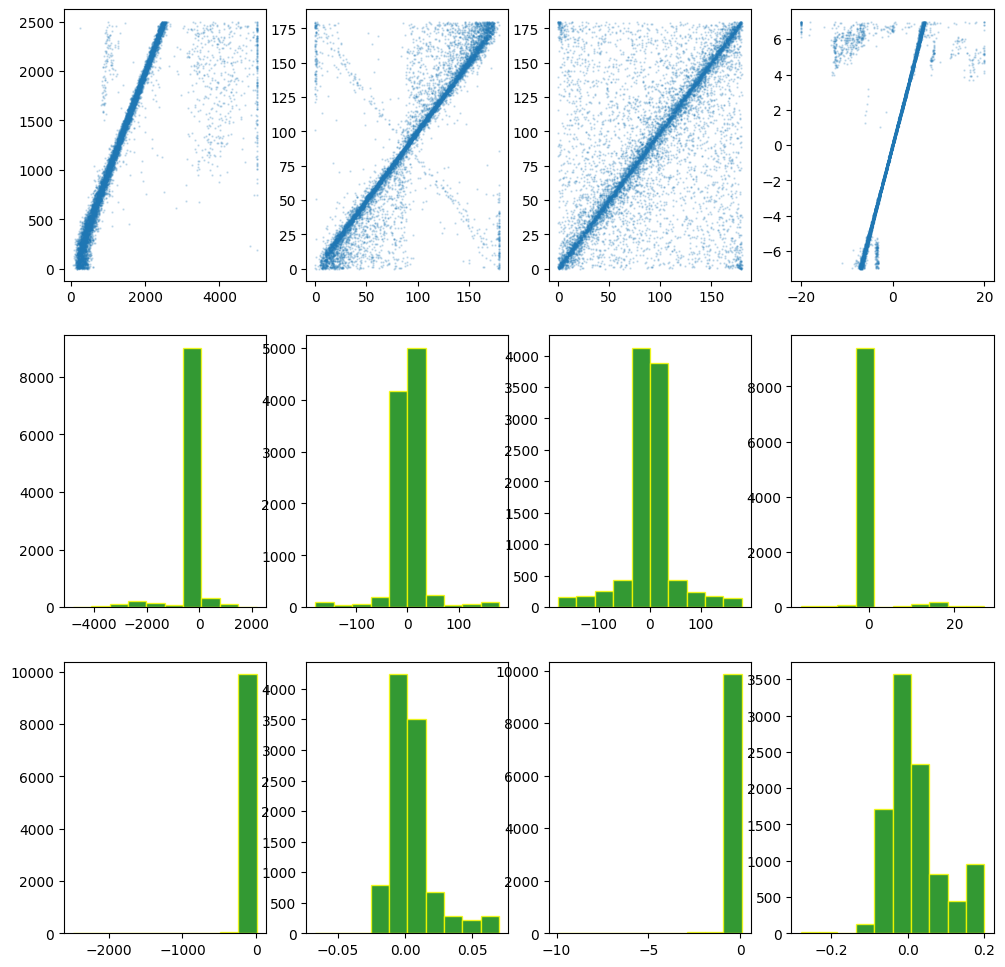

In [24]:
fig, ax = plt.subplots(nrows=3, ncols=4,figsize=(12,12))
ax[0,0].scatter(pmilos_inv[2,:,0],model_big[:,0],s=0.5,alpha=0.2)
ax[0,1].scatter(pmilos_inv[3,:,0],model_big[:,1],s=0.5,alpha=0.2)
ax[0,2].scatter(pmilos_inv[4,:,0],model_big[:,2],s=0.5,alpha=0.2)
ax[0,3].scatter(pmilos_inv[8,:,0],model_big[:,6],s=0.5,alpha=0.2)
ax[1,0].hist(model_big[:,0]-pmilos_inv[2,:,0],alpha=0.8,ec="yellow", fc="green")
ax[1,1].hist(model_big[:,1]-pmilos_inv[3,:,0],alpha=0.8,ec="yellow", fc="green")
ax[1,2].hist(model_big[:,2]-pmilos_inv[4,:,0],alpha=0.8,ec="yellow", fc="green")
ax[1,3].hist(model_big[:,6]-pmilos_inv[8,:,0],alpha=0.8,ec="yellow", fc="green")

ax[2,0].hist(model_big[:,3]-pmilos_inv[5,:,0],alpha=0.8,ec="yellow", fc="green")
ax[2,1].hist(model_big[:,4]-pmilos_inv[6,:,0],alpha=0.8,ec="yellow", fc="green")
ax[2,2].hist(model_big[:,5]-pmilos_inv[7,:,0],alpha=0.8,ec="yellow", fc="green")
ax[2,3].hist(model_big[:,7]-pmilos_inv[9,:,0],alpha=0.8,ec="yellow", fc="green")
# ax[2,2].hist(model_big[:,8]-pmilos_inv[10,0,:],alpha=0.8,ec="yellow", fc="green")
plt.show()